In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('processed_data_final.xlsx')

In [3]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [4]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.72%


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

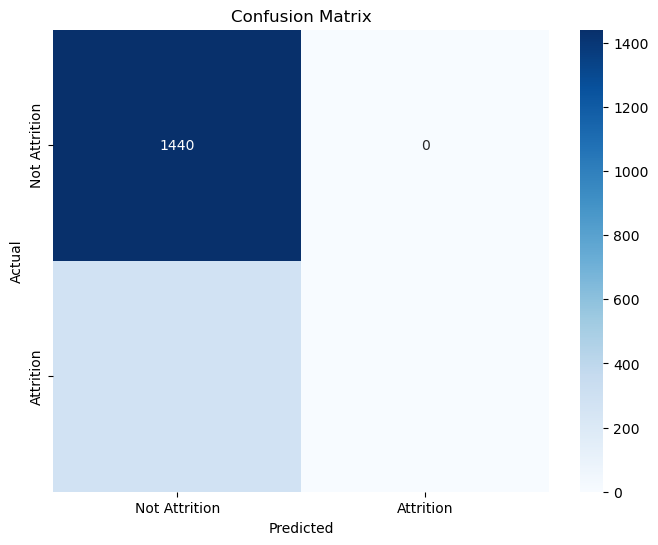

In [13]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
# Get predicted probabilities for class 1 (Attrition)
y_probs = clf.predict_proba(X_test)[:, 1]

In [16]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [17]:
# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

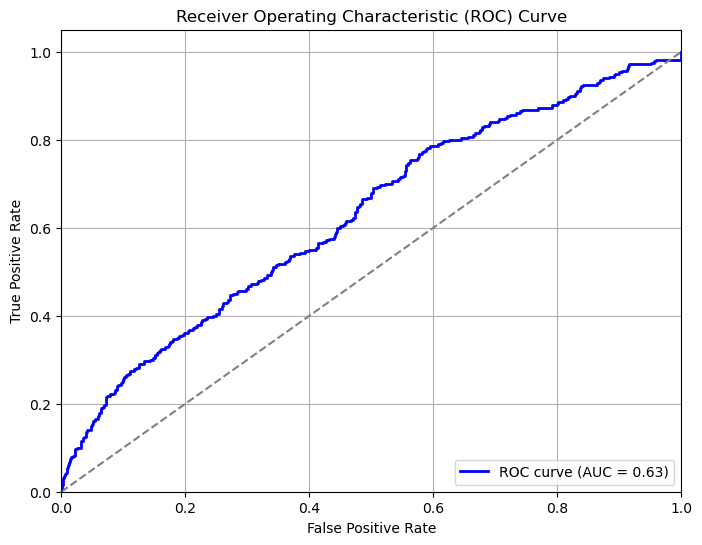

In [18]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score

In [21]:
# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred)

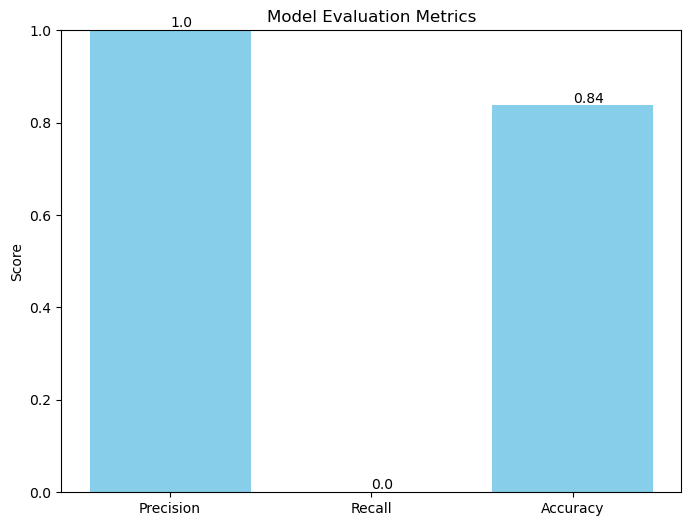

In [22]:
# Create bar chart
metrics = ['Precision', 'Recall', 'Accuracy']
values = [precision, recall, accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()